# Segmentation of credit card Customer 

#### importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# setting the plot size for graphs:
plt.rcParams['figure.figsize'] = (8,6)

####   importing the data 

In [3]:
data = pd.read_csv("credit_card.csv", index_col=0)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### Data Exploration 

In [4]:
data.shape

(8950, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

In [6]:
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.47,2081.53,0.00,128.28,873.39,2054.14,19043.14
BALANCE_FREQUENCY,8950.0,0.88,0.24,0.00,0.89,1.00,1.00,1.00
PURCHASES,8950.0,1003.20,2136.63,0.00,39.64,361.28,1110.13,49039.57
ONEOFF_PURCHASES,8950.0,592.44,1659.89,0.00,0.00,38.00,577.40,40761.25
INSTALLMENTS_PURCHASES,8950.0,411.07,904.34,0.00,0.00,89.00,468.64,22500.00
CASH_ADVANCE,8950.0,978.87,2097.16,0.00,0.00,0.00,1113.82,47137.21
PURCHASES_FREQUENCY,8950.0,0.49,0.40,0.00,0.08,0.50,0.92,1.00
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.20,0.30,0.00,0.00,0.08,0.30,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.36,0.40,0.00,0.00,0.17,0.75,1.00
CASH_ADVANCE_FREQUENCY,8950.0,0.14,0.20,0.00,0.00,0.00,0.22,1.50


In [7]:
# createing the copying 
df= data.copy()

#### Missing Values 

In [8]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

To treat for the missing values in Minimum_Payments shall impute with median values of Minimum Payments and will drop the one missing value of Credit Limit.

In [9]:
df[df["CREDIT_LIMIT"].isnull()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [10]:
# dropping  off the missing  value for Credit Limit 
df.drop(index = "C15349" , inplace = True)


In [11]:
# resetting the index after dropping the record:
df = df.reset_index(drop=True)

In [12]:
df["MINIMUM_PAYMENTS"].unique()

array([ 139.509787, 1072.340217,  627.284787, ...,   82.418369,
         55.755628,   88.288956])

In [13]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace = True)

In [14]:
# Checking again to confirm if missing values are present or not:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### finding out duplicates 

In [15]:
duplicate = df.duplicated()
duplicate.unique()

array([False])

#### Outliers Treatment 

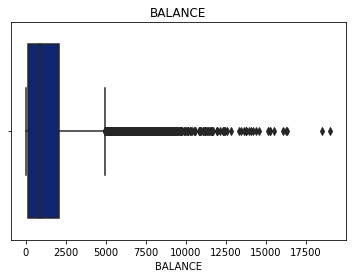

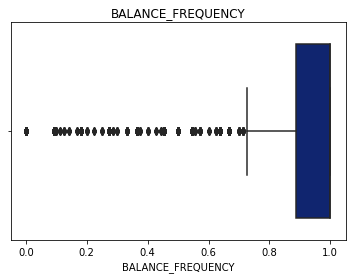

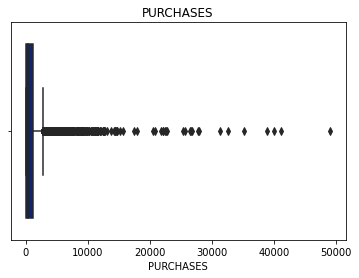

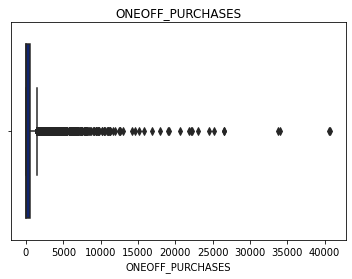

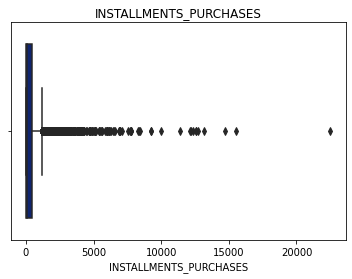

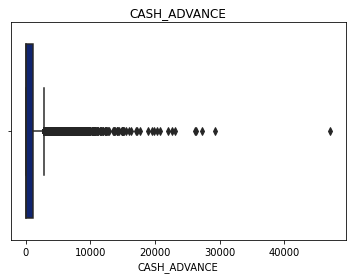

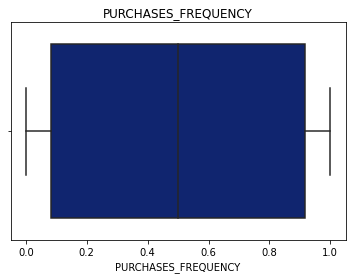

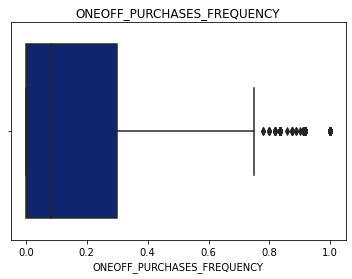

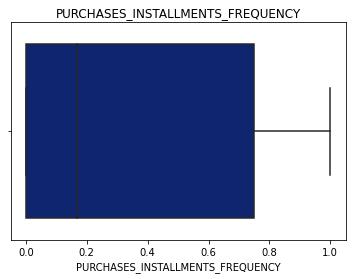

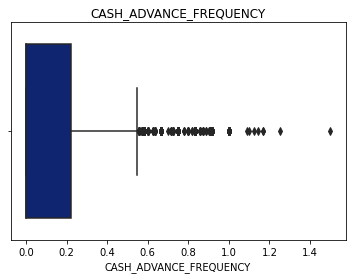

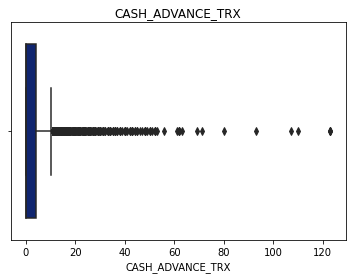

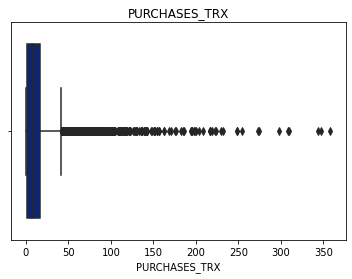

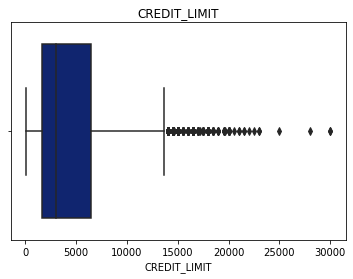

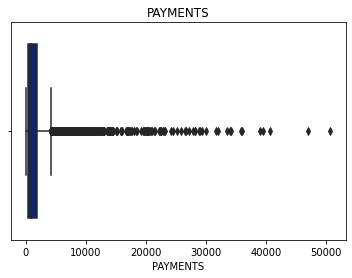

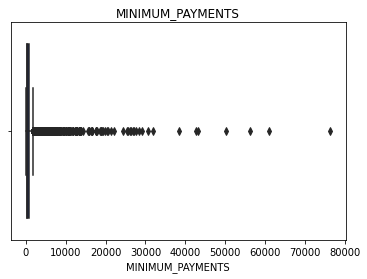

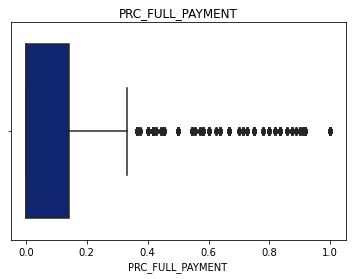

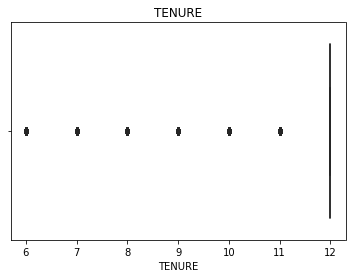

In [16]:
# Box plot 
for i in df.columns:
    sns.boxplot(df[i], palette="dark")
    plt.title("{}".format(i))
    plt.show()

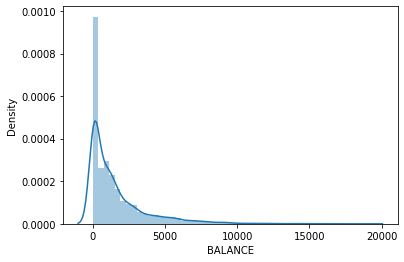

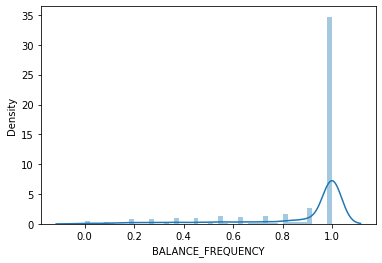

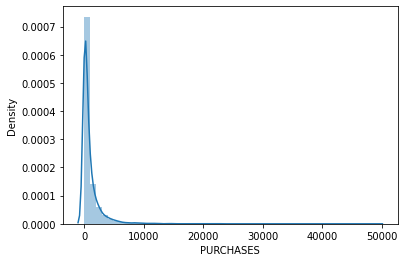

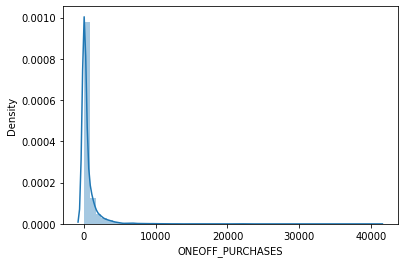

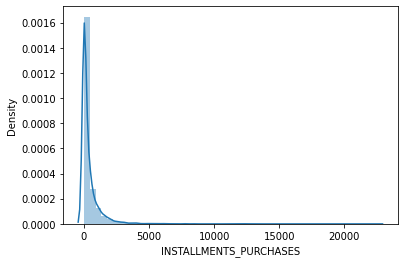

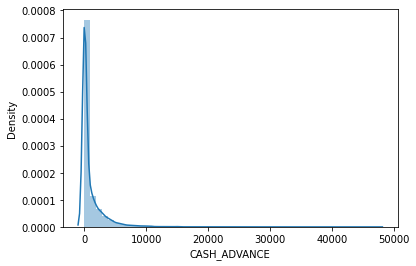

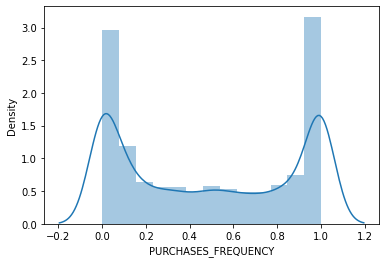

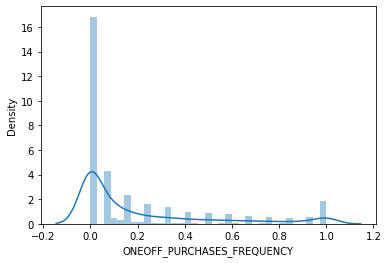

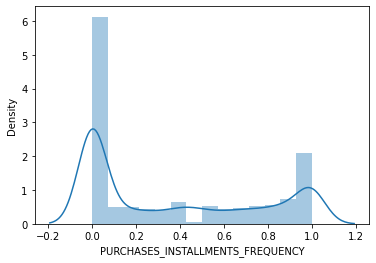

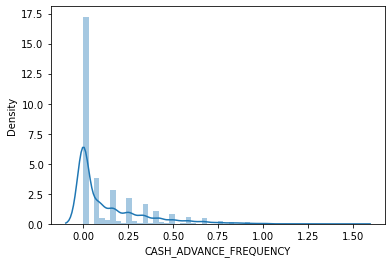

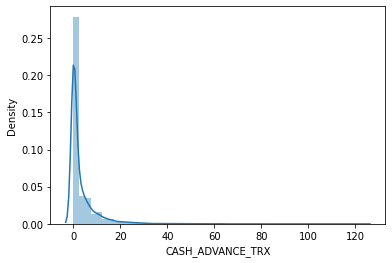

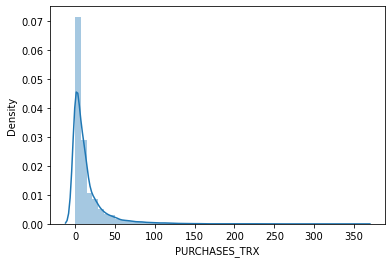

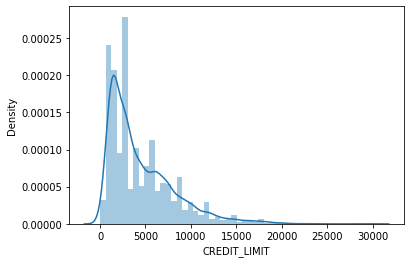

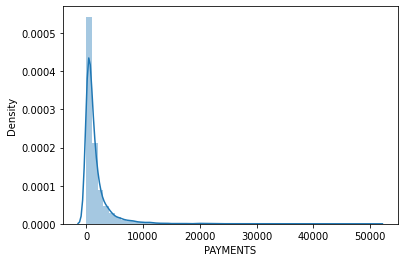

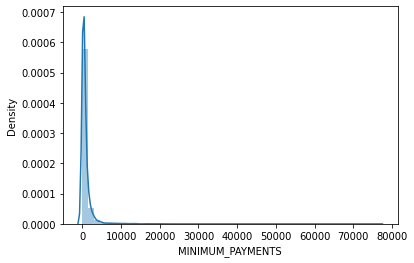

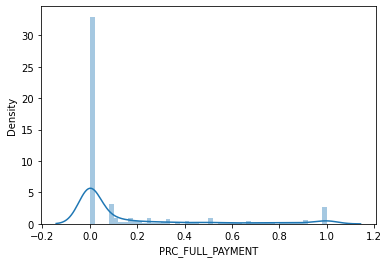

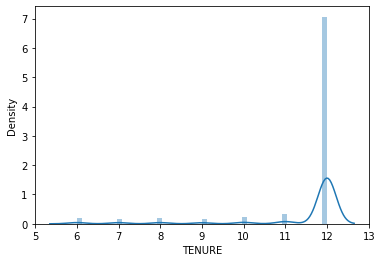

In [17]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()
    



In [18]:
df = np.log1p(df)

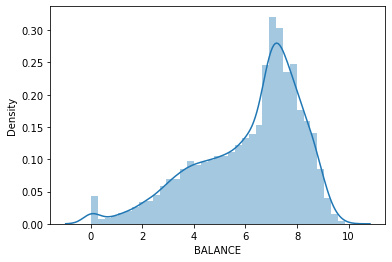

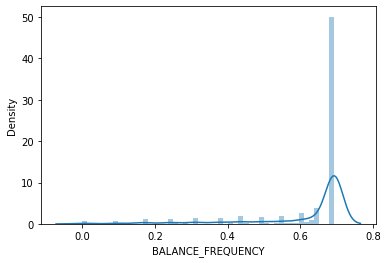

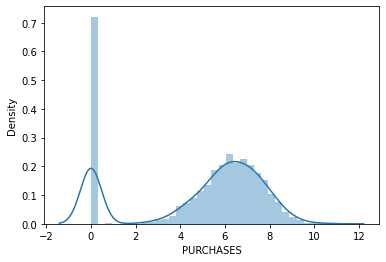

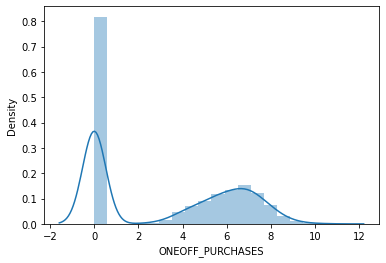

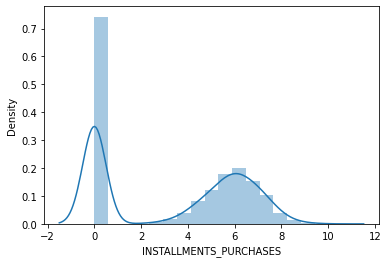

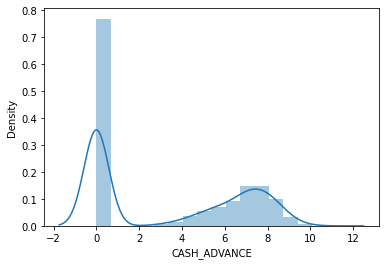

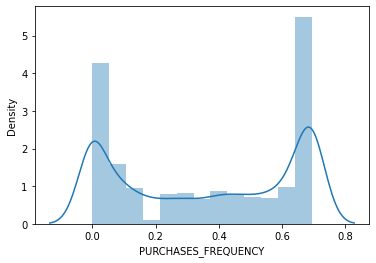

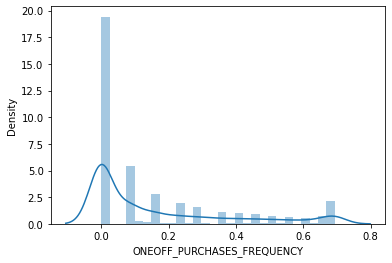

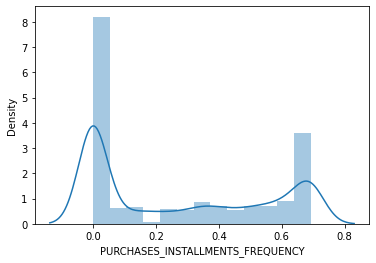

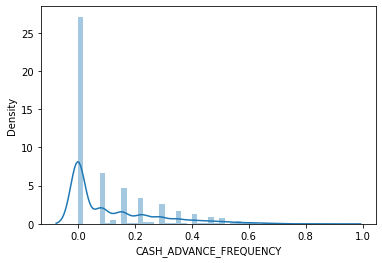

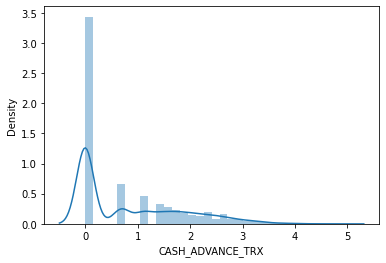

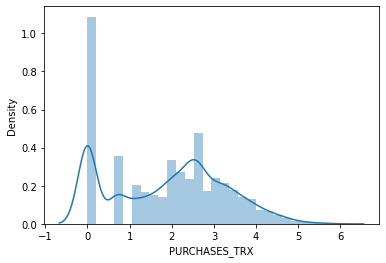

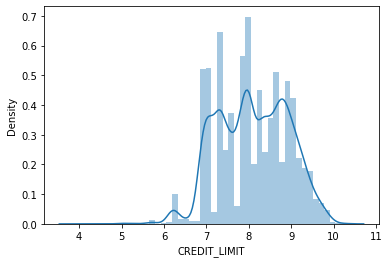

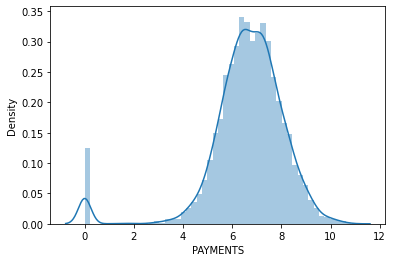

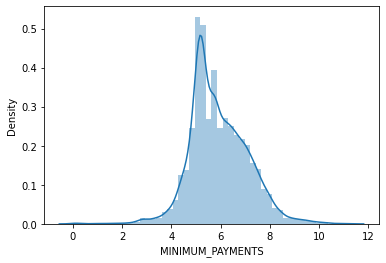

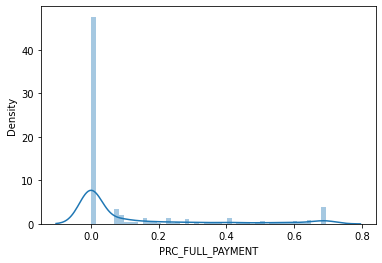

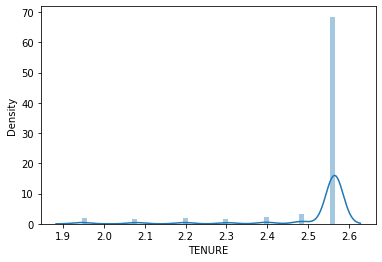

In [19]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

#### OUtliear Treatment using the Z-score 

In [20]:
import scipy.stats as stats
arr=stats.zscore(df)
arr

array([[-1.20549805, -0.14918138, -0.11373165, ..., -0.83045343,
        -0.55640881,  0.34712687],
       [ 0.94882085,  0.17935387, -1.6802134 , ...,  0.90819577,
         0.39188067,  0.34712687],
       [ 0.82488527,  0.49260278,  0.60059995, ...,  0.4502542 ,
        -0.55640881,  0.34712687],
       ...,
       [-1.4741368 , -0.09330209,  0.02718889, ..., -1.27631353,
         0.49807935, -4.40644276],
       [-1.73410004, -0.09330209, -1.6802134 , ..., -1.60562693,
         0.49807935, -4.40644276],
       [-0.11848844, -0.73508435,  0.71925019, ..., -1.21815834,
        -0.55640881, -4.40644276]])

In [21]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [22]:
# convert  numpy array to dataframe 
df = pd.DataFrame(arr, columns =['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'])
#print("\nPandas DataFrame: ")
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.205498,-0.149181,-0.113732,-0.987198,0.394362,-0.930636,-0.747076,-0.732543,-0.674357,-0.724294,-0.810038,-0.579693,-1.447095,-0.825080,-0.830453,-0.556409,0.347127
1,0.948821,0.179354,-1.680213,-0.987198,-1.087586,1.528788,-1.302995,-0.732543,-0.958359,0.699585,0.784546,-1.379434,0.925997,1.065109,0.908196,0.391881,0.347127
2,0.824885,0.492603,0.600600,1.061910,-1.087586,-0.930636,1.196721,2.466616,-0.958359,-0.724294,-0.810038,0.487735,1.010161,-0.119646,0.450254,-0.556409,0.347127
3,0.624529,-0.858641,0.827395,1.265665,-1.087586,0.564410,-1.014336,-0.363114,-0.958359,-0.213543,-0.123288,-0.874853,1.010161,-4.163779,-0.144341,-0.556409,0.347127
4,0.271106,0.492603,-0.708741,-0.114417,-1.087586,-0.930636,-1.014336,-0.363114,-0.958359,-0.724294,-0.810038,-0.874853,-1.224854,-0.065306,-0.352273,-0.556409,0.347127


In [23]:
df.describe().T.round(2)


,count,mean,std,min,25%,50%,75%,max
BALANCE,8949.0,-0.0,1.0,-3.06,-0.65,0.30,0.73,1.83
BALANCE_FREQUENCY,8949.0,-0.0,1.0,-4.17,0.11,0.49,0.49,0.49
PURCHASES,8949.0,0.0,1.0,-1.68,-0.41,0.34,0.72,2.02
ONEOFF_PURCHASES,8949.0,0.0,1.0,-0.99,-0.99,0.14,0.97,2.28
INSTALLMENTS_PURCHASES,8949.0,0.0,1.0,-1.09,-1.09,0.37,0.91,2.16
CASH_ADVANCE,8949.0,0.0,1.0,-0.93,-0.93,-0.93,1.04,2.09
PURCHASES_FREQUENCY,8949.0,-0.0,1.0,-1.30,-1.01,0.16,1.04,1.20
ONEOFF_PURCHASES_FREQUENCY,8949.0,0.0,1.0,-0.73,-0.73,-0.36,0.48,2.47
PURCHASES_INSTALLMENTS_FREQUENCY,8949.0,0.0,1.0,-0.96,-0.96,-0.41,1.03,1.50
CASH_ADVANCE_FREQUENCY,8949.0,0.0,1.0,-0.72,-0.72,-0.72,0.56,5.12


In [24]:
df.shape

(8949, 17)

In [25]:
### removing outliear from the data 

In [26]:
for i in df.columns:
    df = df[ (df[i] <= 3) & (df[i] >= -3)] 
    
    


In [27]:
df.shape

(7925, 17)

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,7925.0,0.084367,0.892584,-2.940283,-0.517746,0.337702,0.735719,1.819826
BALANCE_FREQUENCY,7925.0,0.147071,0.733282,-2.947115,0.179354,0.492603,0.492603,0.492603
PURCHASES,7925.0,0.039455,0.997843,-1.680213,-0.306775,0.384484,0.753643,2.023105
ONEOFF_PURCHASES,7925.0,0.039489,1.005850,-0.987198,-0.987198,0.252826,1.004001,2.282948
INSTALLMENTS_PURCHASES,7925.0,0.036582,1.004368,-1.087586,-1.087586,0.437644,0.931559,2.163164
CASH_ADVANCE,7925.0,-0.018198,0.991679,-0.930636,-0.930636,-0.930636,1.020023,1.953288
PURCHASES_FREQUENCY,7925.0,0.039887,0.995877,-1.302995,-1.014336,0.159245,1.196721,1.196721
ONEOFF_PURCHASES_FREQUENCY,7925.0,0.038003,1.019768,-0.732543,-0.732543,-0.363114,0.595227,2.466616
PURCHASES_INSTALLMENTS_FREQUENCY,7925.0,0.033405,1.004307,-0.958359,-0.958359,-0.166614,1.083115,1.501025
CASH_ADVANCE_FREQUENCY,7925.0,-0.046979,0.916472,-0.724294,-0.724294,-0.724294,0.341677,2.947104


In [29]:
# An outlier of data is defined as a value that is more than 3 and less then  -3 standard deviations from the mean. are been removed 

# Correlation Matrix  

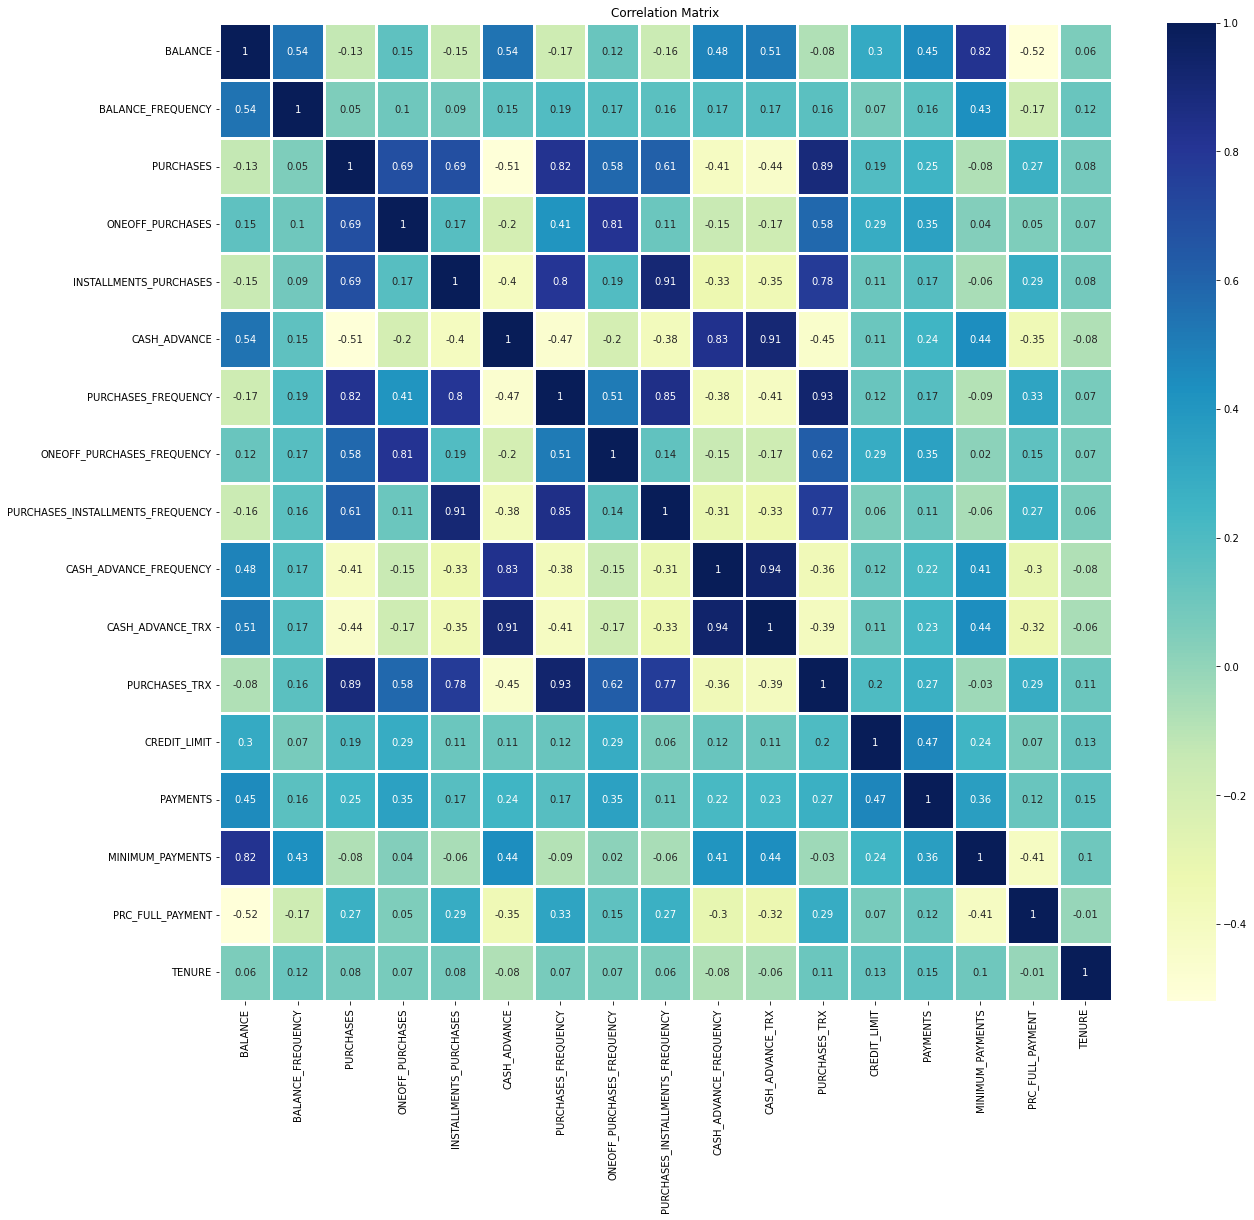

In [30]:
plt.figure(figsize=(20,18))
sns.heatmap(round(df.corr(),2),annot=True, cmap='YlGnBu', linewidths=3, fmt='.2g')
plt.title('Correlation Matrix')
plt.show()

In [31]:
corr= df.corr()

In [32]:
corr.abs().max().sort_values(ascending=False)

BALANCE                             1.0
CASH_ADVANCE_FREQUENCY              1.0
PRC_FULL_PAYMENT                    1.0
MINIMUM_PAYMENTS                    1.0
PAYMENTS                            1.0
CREDIT_LIMIT                        1.0
PURCHASES_TRX                       1.0
CASH_ADVANCE_TRX                    1.0
PURCHASES_INSTALLMENTS_FREQUENCY    1.0
BALANCE_FREQUENCY                   1.0
ONEOFF_PURCHASES_FREQUENCY          1.0
PURCHASES_FREQUENCY                 1.0
CASH_ADVANCE                        1.0
INSTALLMENTS_PURCHASES              1.0
ONEOFF_PURCHASES                    1.0
PURCHASES                           1.0
TENURE                              1.0
dtype: float64

Inference:¶
The correlation value above 0.80 is considered to be highly correlated. From the above heatmap, can observe the following:


We can see that there is multi-collinearity present in the data and would need to use dimension reduction technique as double redudancy information is being fed to the model.

In [33]:
# Scaling the numerical variables



In [34]:
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()
df=scaler1.fit_transform(df)


### Applying PCA- 95 % of the varieance 

Will be performing Prinicipal Component Analysis(PCA) to reduce the dimensions.

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca_model = PCA(n_components = None)
X_PCA = pca_model.fit_transform(df)

In [37]:
X_PCA.shape

(7925, 17)

In [38]:
# Cumulative Variance explained:
pca_var = pca_model.explained_variance_ratio_
np.cumsum(pca_var)

array([0.35441022, 0.57258728, 0.66786042, 0.74469054, 0.80855911,
       0.85516225, 0.89750475, 0.92892843, 0.94956067, 0.96441469,
       0.97400849, 0.98223568, 0.98809779, 0.99352221, 0.99621397,
       0.99849124, 1.        ])

In [39]:
from sklearn.decomposition import  PCA
pca=PCA(n_components=0.95)
df1 =pca.fit_transform(df)
explained_variance=pca.explained_variance_ratio_
print(explained_variance)

[0.35441022 0.21817707 0.09527314 0.07683012 0.06386857 0.04660314
 0.0423425  0.03142368 0.02063224 0.01485403]


In [40]:
df1.shape

(7925, 10)

# Clustering with KMean 

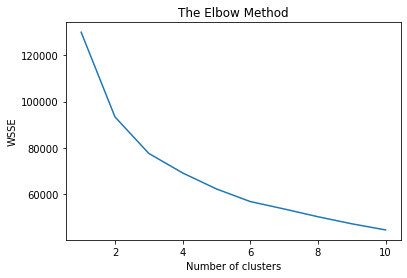

In [41]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

wsse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,  random_state = 10)
    kmeans.fit(df1)
    wsse.append(kmeans.inertia_) # inertia is ststic term for wsse
plt.plot(range(1, 11), wsse)
#plt.scatter(range(1, 11),wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [42]:
print(wsse) # value for K 

[129930.7697207995, 93409.21832895924, 77675.15063537075, 69255.64078198996, 62351.59339628894, 56911.01535367367, 53722.223037328615, 50371.93026548188, 47328.50768120343, 44684.07158297219]


In [43]:
# fitting K-Means to the dataset
kmeans = KMeans(n_clusters= 3 ,random_state = 10)
Y_pred = kmeans.fit_predict(df1)


In [44]:
df1=pd.DataFrame(df1,columns=["col"+str(x) for x in range(1,11)])

In [45]:
# ADD it also to  the original data frame
df1["cluster"]=Y_pred

In [46]:
df1.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,cluster
0,-0.202977,-3.161361,-0.438138,-1.030954,-0.010378,-0.557548,0.467628,-0.117380,0.211823,-0.277478,1
1,-3.670311,0.934123,0.233316,0.884686,-1.510828,0.741695,-0.771581,-0.438138,0.066724,0.364960,2
2,1.296287,1.233593,2.293448,-1.859256,0.262891,0.151007,-0.279309,0.878155,-0.502860,1.093270,0
3,-1.185878,-1.613537,0.680455,-1.915708,-0.212411,-0.143551,-0.608524,-0.663209,0.579052,-0.221930,1
4,0.989315,0.381400,-1.958876,-1.521312,-0.619135,0.914304,0.227169,-1.257296,-0.450685,-0.166719,0


<AxesSubplot:xlabel='col1', ylabel='col3'>

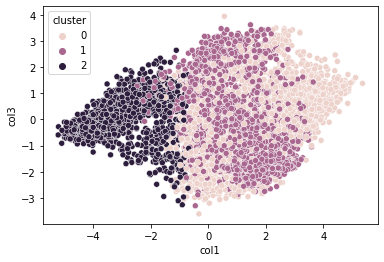

In [47]:
sns.scatterplot(data=df1 ,x=df1["col1"],y=df1["col3"],hue = df1['cluster'])

<AxesSubplot:xlabel='cluster', ylabel='count'>

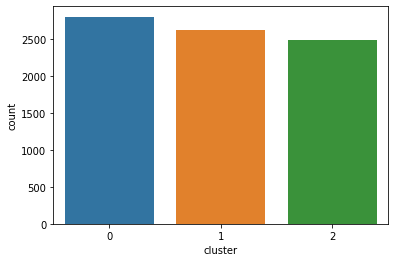

In [48]:
sns.countplot(x=df1["cluster"])

We can see that the number of customers in each cluster is approximately the same.

# Silhouette Score method 

In [49]:
from sklearn.metrics import silhouette_score 
n_cluster = [2,3,4,5,6,7,8,9,10]

for K in n_cluster:
    cluster= KMeans (n_clusters=K,random_state=10)
    predict = cluster.fit_predict(df1)
    
    score = silhouette_score(df1,predict,random_state=10)
    print("for n_cluster={}, silhouette score is {}".format(K,score))

for n_cluster=2, silhouette score is 0.29078576329134015
for n_cluster=3, silhouette score is 0.2610902659739172
for n_cluster=4, silhouette score is 0.2425918934615215
for n_cluster=5, silhouette score is 0.24552351195129718
for n_cluster=6, silhouette score is 0.24272459693040263
for n_cluster=7, silhouette score is 0.20571158888254398
for n_cluster=8, silhouette score is 0.21282016836234072
for n_cluster=9, silhouette score is 0.20460336992451217
for n_cluster=10, silhouette score is 0.2051951977525585


The optimum value for K is associated with the high value of the 'silhouette score'. From the above output it can be seen that, for K = 3, the silhouette score is highest. Thus, we build the clusters with K = 3

In [50]:
# fitting K-Means to the dataset
kmeans = KMeans(n_clusters= 3 ,random_state = 10)
Y_pred = kmeans.fit_predict(df1)

In [51]:
# ADD it also to  the original data frame
df1["Silhouette_cluster"]=Y_pred

<AxesSubplot:xlabel='Silhouette_cluster', ylabel='count'>

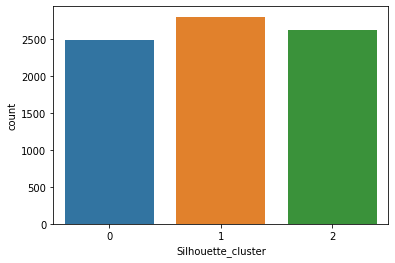

In [52]:
sns.countplot(x=df1["Silhouette_cluster"])

<AxesSubplot:xlabel='col1', ylabel='col3'>

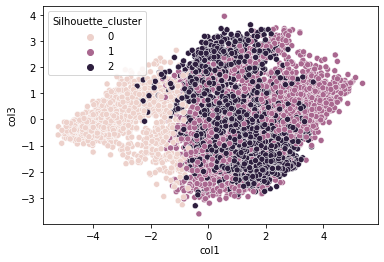

In [53]:
sns.scatterplot(data=df1 ,x=df1["col1"],y=df1["col3"],hue = df1['Silhouette_cluster'])